## Problem: Harmonic density waves

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Discretisation
N_x = 100
N_t = 200

# x-Limits
x_0 = 0
x_f = 1.01

# t-Limits
t_0 = 0
t_f = 2

# Step sizes
delta_x = (x_f - x_0)/N_x
delta_t = (t_f - t_0)/N_t

# Axes
x = np.arange(x_0, x_f + delta_x, delta_x)
t = np.arange(t_0, t_f + delta_t, delta_t)

# Meshgrid
X, Y = np.meshgrid(x, t)

In [19]:
print(delta_x, delta_t)

0.0101 0.01


In [4]:
# Function for the analytical solution

def exact_sln(XX, YY):
    
    sln = np.sin(np.pi*XX)*(np.cos(np.pi*YY)\
          + np.sin(np.pi*YY)/np.pi)
    
    return sln

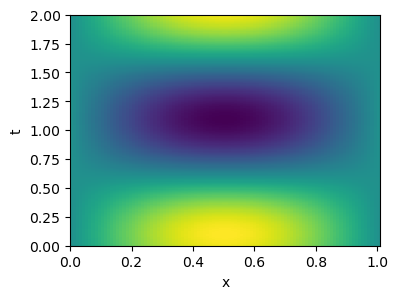

In [5]:
# Surface plot
Z_exact = exact_sln(X, Y)

# Plotting
plt.figure(figsize=(4,3))

plt.pcolor(X, Y, Z_exact, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.show()

In [6]:
from mpl_toolkits.mplot3d import axes3d

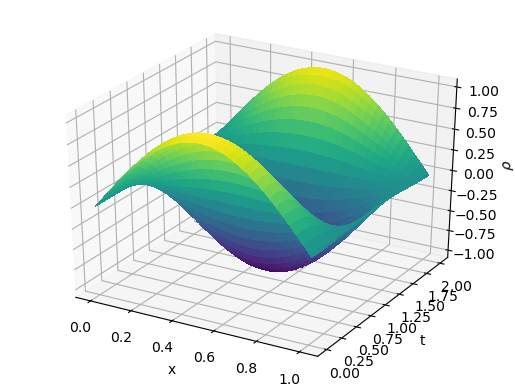

In [7]:
fig = plt.figure()

ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.plot_surface(X, Y, Z_exact, cmap='viridis', linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel(r'$\rho$')

plt.show()

## Numerical solution using central differences:

In [8]:
# Create our domain, empty matrix

rho_num = np.zeros((N_x + 1, N_t + 1))

# We want to enforce the right-side BC to be 0

print(rho_num.shape)

(101, 201)


In [9]:
# Boundary conditions
rho_num[0, :] = 0
rho_num[-1, :] = 0

# Initial conditions
rho_num[:, 0] = np.sin(np.pi*x)

# Second row of the matrix (we used the
# derivative information)

rho_num[:, 1] = np.sin(np.pi*x)*(1 + delta_t)


In [10]:
print(X.shape, Y.shape, rho_num.shape)

(201, 101) (201, 101) (101, 201)


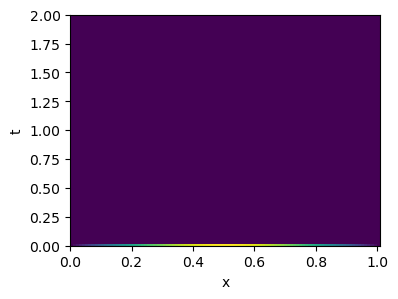

In [11]:
# Plot to check the matrix
plt.figure(figsize=(4,3))

plt.pcolor(X, Y, rho_num.T, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.show()

### Define r

In [12]:
# Speed
c = 1

# Factor in front of the derivatives
r_factor = c**2*delta_t**2/delta_x**2

In [13]:
# Numerical solution - we need a FOR loop

for j in range(1, N_t):
    for i in range(1, N_x-1):
        
        rho_num[i, j+1] = r_factor*(rho_num[i-1, j]\
        - 2*rho_num[i, j] + rho_num[i+1, j])\
        + 2*rho_num[i, j] - rho_num[i, j-1]

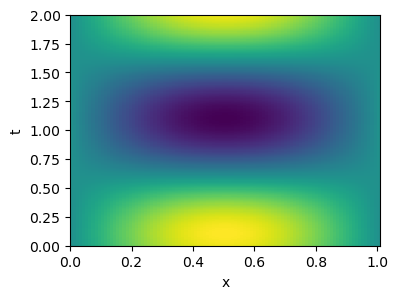

In [14]:
# Plot full solution
plt.figure(figsize=(4,3))

plt.pcolor(X, Y, rho_num.T, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.show()

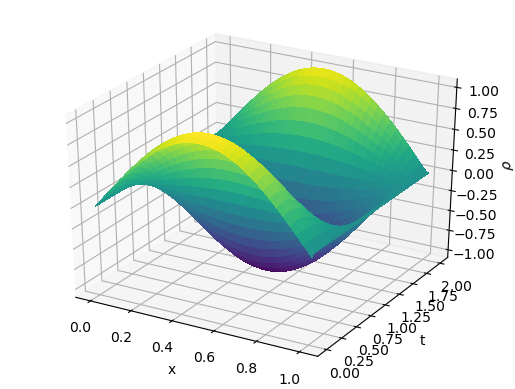

In [15]:
fig = plt.figure()

ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.plot_surface(X, Y, rho_num.T, cmap='viridis', linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel(r'$\rho$')

plt.show()

### Error map

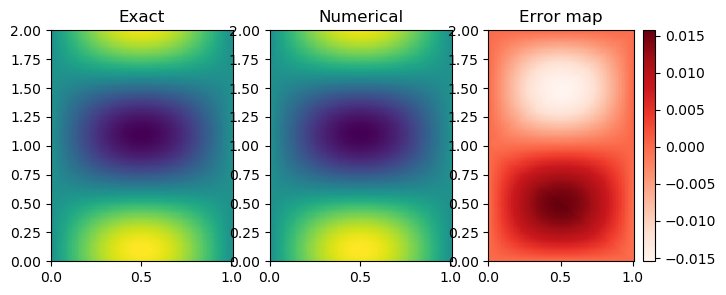

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (8,3))

ax1.pcolor(X, Y, Z_exact, cmap = 'viridis')
ax1.set_title("Exact")

ax2.pcolor(X, Y, rho_num.T, cmap = 'viridis')
ax2.set_title("Numerical")

surf3 = ax3.pcolor(X, Y, rho_num.T - Z_exact, cmap = 'Reds')
ax3.set_title("Error map")
plt.colorbar(surf3)

plt.show()

### L_2 norm error

In [21]:
L2_error = np.sqrt(np.sum((rho_num.T - Z_exact)**2)\
         /((N_x + 1)*(N_t + 1)))

In [23]:
print(L2_error)

0.007952402837205696
